<a href="https://colab.research.google.com/github/CMOONCS/Outreach_JC_AI4F_2024/blob/main/IllusionDiffusion_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="7">Experiment: Using Illusion Diffusion</font>
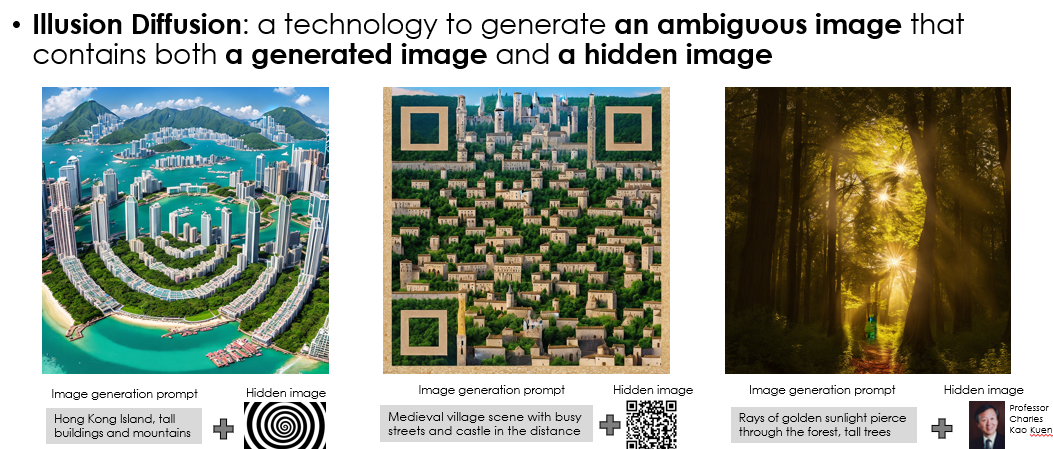
---
---
**Credits:**
1. [camenduru/IllusionDiffusion-hf](https://github.com/camenduru/IllusionDiffusion-hf)  
2. [camenduru/FreeU_Diffusers](https://github.com/camenduru/FreeU_Diffusers)
3. [FreeU](https://github.com/ChenyangSi/FreeU)

### Copyright  @CUHK Jockey Club AI for the Future Project
---





## **# 1. Download Repositories from GitHub**

In [ ]:
%cd /content
!git clone -b dev https://github.com/MiltonChanKC/IllusionDiffusion-hf.git
!git clone -b diffusers-v0.21.2 https://github.com/MiltonChanKC/FreeU_Diffusers.git

## **# 2. Install Python Packages**

In [ ]:
%%capture output
%cd /content/IllusionDiffusion-hf
!pip install --quiet -r requirements.txt

## **# 3. Load a Pretrained Diffusion Pipeline and Modify the "app.py" File**

---



In [ ]:
import torch, sys
from diffusers import DiffusionPipeline

!mkdir /content/model
model_id = "runwayml/stable-diffusion-v1-5" # @param {type:"string"}
pipeline = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipeline.save_pretrained('/content/model', safe_serialization=False)

file_path = '/content/IllusionDiffusion-hf/app.py'

with open(file_path, 'r') as file:
    content = file.read()

#Modify the "app.py" file
modified_content = content.replace('/content/models/torch/cyberrealistic', model_id)

with open(file_path, 'w') as file:
    file.write(modified_content)

#Integrate FreeU into the Diffusion Model to Improve Image Generation Quality
sys.path.append('/content/FreeU_Diffusers')

from free_lunch_utils import register_free_upblock2d, register_free_crossattn_upblock2d
register_free_upblock2d(pipeline, b1=1.2, b2=1.4, s1=0.9, s2=0.2)
register_free_crossattn_upblock2d(pipeline, b1=1.2, b2=1.4, s1=0.9, s2=0.2)

## **# 4. Start the WebUI**


In [ ]:
!python app.py